In [1]:
import os
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tools.portfolio import simulate_longonly

In [2]:
price_df = pd.read_pickle("data/asset_cc2.pkl")

In [3]:
price_df_slice = price_df.loc[:, ["snp", "t10"]]

In [4]:
d = pd.read_pickle("results/res2/weights_concat.pkl")
monthly_index = d.groupby(d.index.to_period('M')).head(1).index
monthly_index

FileNotFoundError: [Errno 2] No such file or directory: 'results/res2/weights_concat.pkl'

In [59]:
benchmark_weight = pd.DataFrame(index=monthly_index, columns=["snp","t10"])
benchmark_weight["snp"] = 0.8
benchmark_weight["t10"] = 0.2

In [60]:
result = simulate_longonly(
    group_weight_df=benchmark_weight,
    price_df=price_df_slice,
    fee_rate=0
)

In [61]:
result.to_pickle("data/8-2.pkl")

In [62]:
snp = price_df['snp'].loc[result.index[0]:]
snp_norm = snp / snp.iloc[0]

<Axes: >

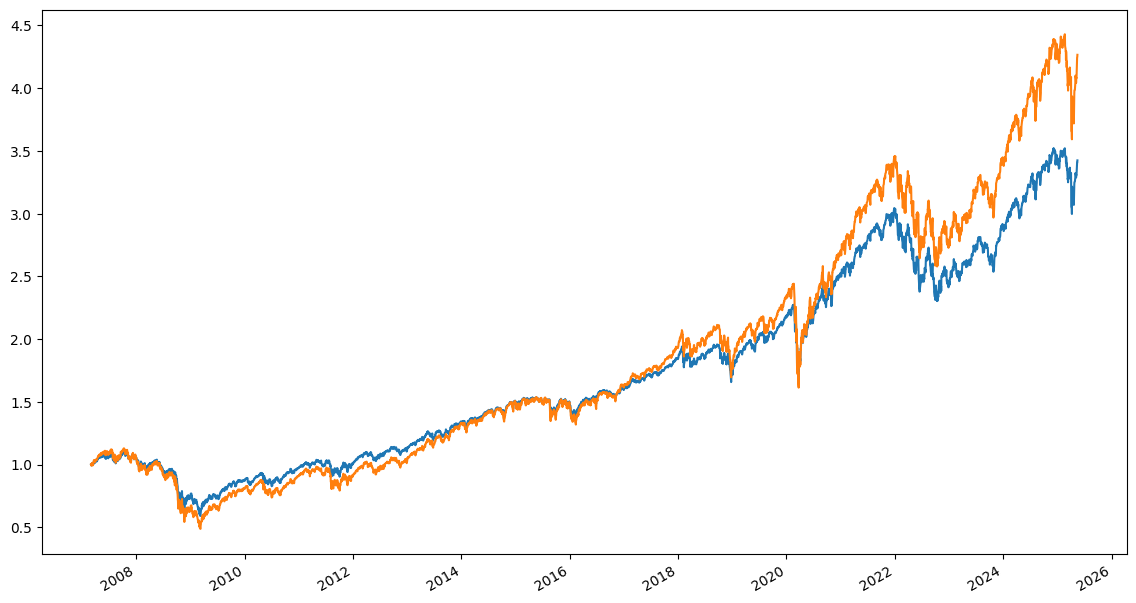

In [63]:
result.plot(figsize=(14,8))
snp_norm.plot()

In [110]:
result = result['2010':]
result /= result.iloc[0]

In [111]:
benchmark = price_df['snp'].loc[result.index[0]:]
benchmark /= benchmark.iloc[0]

In [112]:
result_rtn = result.pct_change(fill_method=None)
benchmark_rtn = benchmark.pct_change(fill_method=None)

print(result_rtn.mean() * 252 / (result_rtn.std()*np.sqrt(252)))
print(benchmark_rtn.mean() * 252 / (benchmark_rtn.std()*np.sqrt(252)))

0.7975019034487378
0.7055166344317759


<Axes: >

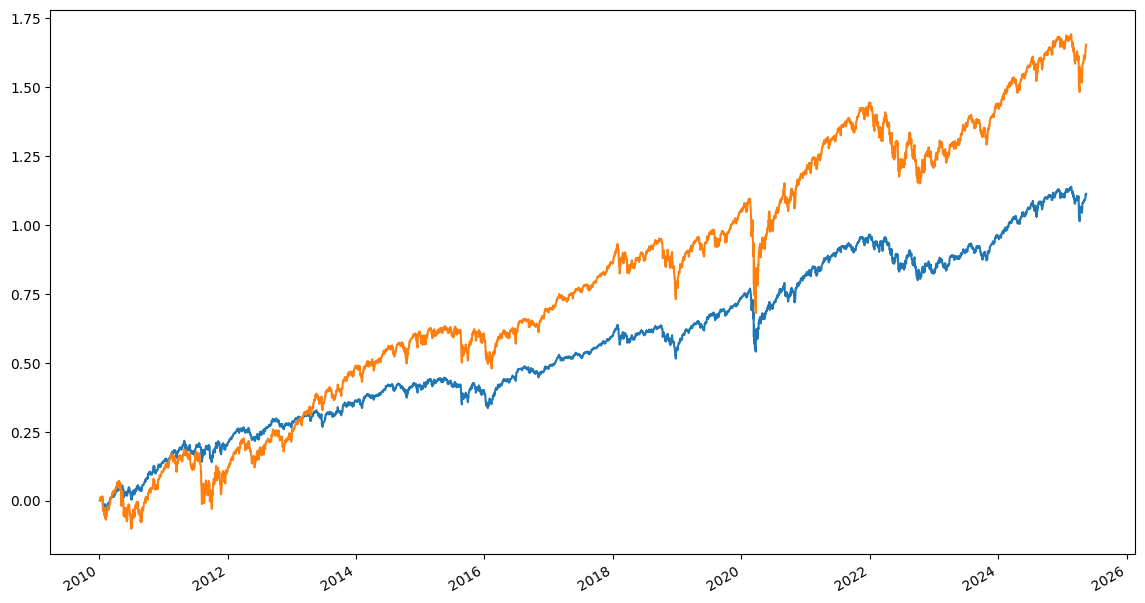

In [113]:
np.log(result).plot(figsize=(14,8))
np.log(benchmark).plot()